In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
import random

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

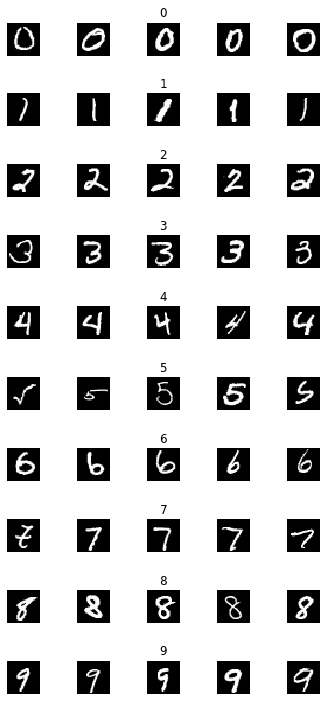

In [6]:
num_of_samples=[]
 
cols = 5
num_classes = 10
# Creating grid using subplots. It allows to display multiple plots on the same figure.
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      # Selecting those images from X_train which have a label of j in the jth iteration to display it in th jth row/class.
      x_selected = X_train[y_train == j]
      # Selecting a random image of label/class j and displaying it in the axs[j][i] subplot.
      # cmap is the color map argument used for gray background.
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        # Storing the number of lables of each class(0 to 9) present in X_train
        # x_selected contain the number of labels of class j in every jth iteration
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


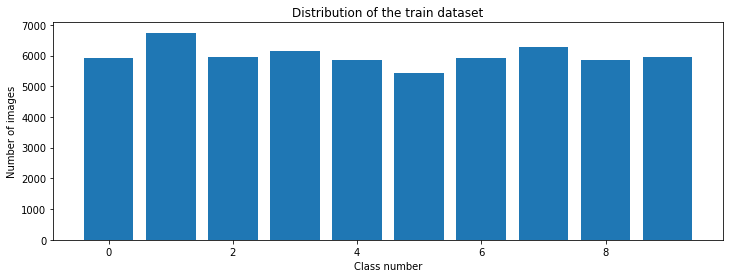

In [7]:
# Hence, there are 5923 samples of 0's, 6742 samples of 1's, 5958 samples of 2's and so on...
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [8]:
# Reshaping to specify the depth of 1. This is beacause we are dealing with grayscale images which only have a single color channel. 
# Hence depth of X_train and kernel filter will be 1.
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [9]:
# Converting labels into one-hot encoded form
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
# Normalizing pixel values of images. Each image has a pixel intensity between 0 to 255.
# We scale down this value between 0 to 1. This is done to prevent errors due to large exponential values of e^255.
X_train = X_train/255
X_test = X_test/255

In [11]:
# define the larger model
def leNet_model():
  # create model
  model = Sequential()
  # The first convolution layers consists of 30 kernel filters, kernel size of 5x5.
  # Input shape suggests that the input will be a 28x28 pixels image having a depth of 1(due to single color channel).
  # Now the input image is processed and the output from this conv layer is obtained in form of 30 feature maps of size 24x24 (24x24x30).
  # The first pooling layer(max pooling) takes the input of 30 feature maps of 24x24. The size of pooling element is 2x2.
  # Pooling element is just like the filter in conv layer having kernel size(pool_size) in convolution layers.
  # The convoluted image is minized in the pooling process to a size of 12x12x30(30 means the 30 feature maps).
  model.add(Conv2D(filters=30, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # The seond convolution layers consists of 15 kernel filters, kernel size of 3x3.
  # Now the input image is processed and the output from this conv layer is obtained in form of 15 feature maps of size 10x10 (10x10x15).
  # The second pooling layer(max pooling) takes the input of 15 feature maps of 10x10. The size of pooling element is 2x2.
  # Pooling element is just like the filter in conv layer having kernel size(pool_size) in convolution layers.
  # The convoluted image is minized in the pooling process to a size of 5x5x15(15 means the 15 feature maps).
  model.add(Conv2D(filters=15, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  # This layers flattens the output of second pooling layers into 1D size of 375 (5x5x15)
  model.add(Flatten())
  # This is the first fully connected layer(hidden) having 500 nodes
  model.add(Dense(units=500, activation='relu'))
  # Dropout layer is used to reduce overfitting. It randomly switches off few neurons with every update so that the model becomes versatile.
  model.add(Dropout(0.5))
  # This is the second fully connected layer(output) having 10 output nodes(10 classes of 10 digits)
  model.add(Dense(units=num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [12]:
model = leNet_model()
print(model.summary())






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
____________________

In [13]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 54000 samples, validate on 6000 samples
Epoch 1/10





54000/54000 [==============================] - 40s 737us/step - loss: 0.2769 - acc: 0.9155 - val_loss: 0.0509 - val_acc: 0.9853
Epoch 2/10
54000/54000 [==============================] - 38s 711us/step - loss: 0.0704 - acc: 0.9785 - val_loss: 0.0403 - val_acc: 0.9880
Epoch 3/10
54000/54000 [==============================] - 38s 706us/step - loss: 0.0596 - acc: 0.9822 - val_loss: 0.0479 - val_acc: 0.9862
Epoch 4/10
54000/54000 [==============================] - 38s 699us/step - loss: 0.0519 - acc: 0.9839 - val_loss: 0.0368 - val_acc: 0.9888
Epoch 5/10
54000/54000 [==============================] - 38s 698us/step - loss: 0.0431 - acc: 0.9864 - val_loss: 0.0340 - val_acc: 0.9905
Epoch 6/10
54000/54000 [==============================] - 38s 697us/step - loss: 0.0403 - acc: 0.9875 - val_loss: 0.0376 - val_acc: 0.9892
Epoch 7/10
5400

Text(0.5, 0, 'epoch')

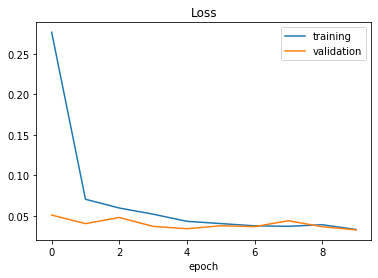

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

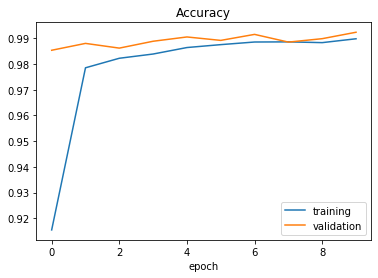

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

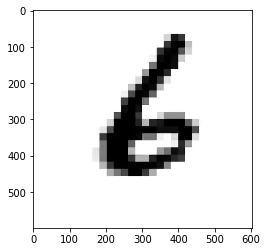

In [16]:
import requests
from PIL import Image

# Few sample handwritten digits for prediction
# url = 'https://www.neuralnine.com/wp-content/uploads/2019/09/3.png'
# url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZzq9qpymH3PGIYvmFOKpMkz02zdsArgVHXkBQdERlug7SLmqA9w&s'
url = 'https://i.stack.imgur.com/Ds5Rc.png'

response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

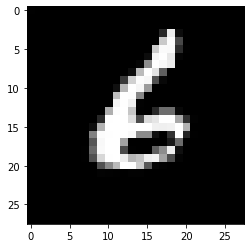

In [17]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [18]:
img = img/255
img = img.reshape(1, 28, 28, 1)

In [19]:
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [6]


In [20]:
# Testing the accuracy on test data
score = model.evaluate(X_test, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.031867541314343405
Test accuracy: 0.9914


In [21]:
# Using Model class API to instantiate layers from pre-trained models to visualize the outputs of convolution layers.
# We can see what features the kernel filters extract from the input data.
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


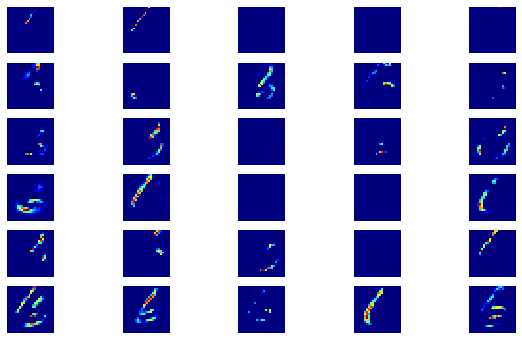

In [22]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

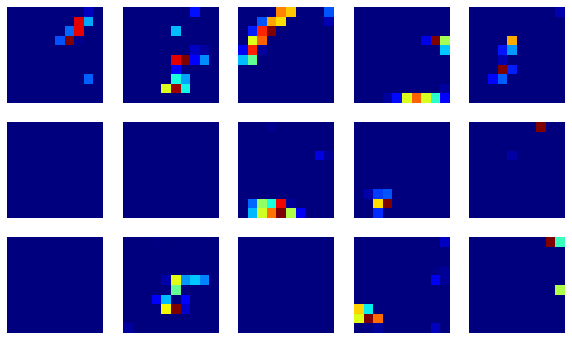

In [23]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')